In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

65.81796954730802 23.169943559991196
-11.376755249013812 -152.5231266121887
42.24634729277162 136.4442868231502
27.31572073924481 -158.2932277306479
43.93882683128635 117.80220914949189
-60.510657358823465 -80.83561080138846
-41.00911005371955 86.8828297904642
7.663162640439779 -116.51593309944475
18.088113121895404 -29.226652835648963
-2.3567650840889485 -30.883629437364846
-19.143124701786974 -74.16032124080391
53.377303411301824 19.21905226785688
77.91497556154948 -66.66497023336453
48.51539139133402 98.8314698126577
48.08207641159427 -39.475191442203595
-3.343090047440043 23.176236416243484
11.674660406816074 -169.96165493402924
-68.02494495460004 43.158798795645794
15.55375599644897 133.4258653684601
49.447692355991904 84.44251282632962
-81.46044701761907 63.40841498421352
26.59368621259344 55.93776455592513
-52.52127385965726 -98.53588806925114
72.99875770018184 -132.6722658822267
-66.17274137120975 -85.46991194767223
26.89778390880555 9.450896646105235
24.29383070341119 -174.120

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

622

In [7]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        city_weather_description = city_weather["weather"][0]["description"]

        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Description": city_weather_description,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tornio
Processing Record 2 of Set 1 | faanui
Processing Record 3 of Set 1 | olga
Processing Record 4 of Set 1 | kapaa
Processing Record 5 of Set 1 | chifeng
Processing Record 6 of Set 1 | punta arenas
Processing Record 7 of Set 1 | busselton
Processing Record 8 of Set 1 | san patricio
Processing Record 9 of Set 1 | ponta do sol
Processing Record 10 of Set 1 | touros
Processing Record 11 of Set 1 | camana
Processing Record 12 of Set 1 | brodnica
Processing Record 13 of Set 1 | narsaq
Processing Record 14 of Set 1 | moron
Processing Record 15 of Set 1 | torbay
Processing Record 16 of Set 1 | lodja
Processing Record 17 of Set 1 | port alfred
Processing Record 18 of Set 1 | meyungs
City not found. Skipping...
Processing Record 19 of Set 1 | zyryanovsk
Processing Record 20 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 21 of Set 1 | qeshm
Processing Record 22 of Set 1 | castro
Proc

Processing Record 36 of Set 4 | chuy
Processing Record 37 of Set 4 | hasaki
Processing Record 38 of Set 4 | high level
Processing Record 39 of Set 4 | victoria
Processing Record 40 of Set 4 | fare
Processing Record 41 of Set 4 | manaus
Processing Record 42 of Set 4 | leh
Processing Record 43 of Set 4 | barrow
Processing Record 44 of Set 4 | mantua
Processing Record 45 of Set 4 | east london
Processing Record 46 of Set 4 | grand-lahou
Processing Record 47 of Set 4 | mecca
Processing Record 48 of Set 4 | georgetown
Processing Record 49 of Set 4 | sayyan
Processing Record 50 of Set 4 | sao joao da barra
Processing Record 1 of Set 5 | ola
Processing Record 2 of Set 5 | djougou
Processing Record 3 of Set 5 | cuxhaven
Processing Record 4 of Set 5 | hamilton
Processing Record 5 of Set 5 | jabiru
City not found. Skipping...
Processing Record 6 of Set 5 | ucluelet
Processing Record 7 of Set 5 | carutapera
Processing Record 8 of Set 5 | badhni kalan
Processing Record 9 of Set 5 | zhengjiatun
Pro

Processing Record 26 of Set 8 | sorvag
City not found. Skipping...
Processing Record 27 of Set 8 | naze
Processing Record 28 of Set 8 | safranbolu
Processing Record 29 of Set 8 | trairi
Processing Record 30 of Set 8 | kazanskaya
Processing Record 31 of Set 8 | sorong
Processing Record 32 of Set 8 | tungor
Processing Record 33 of Set 8 | dingle
Processing Record 34 of Set 8 | sabya
Processing Record 35 of Set 8 | tumannyy
City not found. Skipping...
Processing Record 36 of Set 8 | iquitos
Processing Record 37 of Set 8 | kawalu
Processing Record 38 of Set 8 | ust-karsk
Processing Record 39 of Set 8 | nova londrina
Processing Record 40 of Set 8 | manadhoo
Processing Record 41 of Set 8 | pangnirtung
Processing Record 42 of Set 8 | campos belos
Processing Record 43 of Set 8 | greensburg
Processing Record 44 of Set 8 | aykino
Processing Record 45 of Set 8 | santiago del estero
Processing Record 46 of Set 8 | kaduy
Processing Record 47 of Set 8 | deputatskiy
Processing Record 48 of Set 8 | ta

Processing Record 16 of Set 12 | san ramon
Processing Record 17 of Set 12 | aklavik
Processing Record 18 of Set 12 | dong hoi
Processing Record 19 of Set 12 | ahipara
Processing Record 20 of Set 12 | ust-tsilma
Processing Record 21 of Set 12 | imbituba
Processing Record 22 of Set 12 | saint-louis
Processing Record 23 of Set 12 | woodward
Processing Record 24 of Set 12 | ternate
Processing Record 25 of Set 12 | taltal
Processing Record 26 of Set 12 | north branch
Processing Record 27 of Set 12 | palmas bellas
Processing Record 28 of Set 12 | zihuatanejo
Processing Record 29 of Set 12 | aitape
Processing Record 30 of Set 12 | zabol
Processing Record 31 of Set 12 | quatre cocos
Processing Record 32 of Set 12 | verkhnyaya inta
Processing Record 33 of Set 12 | hohhot
Processing Record 34 of Set 12 | rawson
Processing Record 35 of Set 12 | bogorodskoye
Processing Record 36 of Set 12 | oranjestad
Processing Record 37 of Set 12 | qiongshan
Processing Record 38 of Set 12 | luwuk
Processing Reco

In [10]:
len(city_data)

572

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Description,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tornio,65.8481,24.1466,26.62,overcast clouds,92,100,4.76,FI,2022-11-10 05:18:22
1,Faanui,-16.4833,-151.7500,79.18,light rain,78,99,14.74,PF,2022-11-10 05:18:22
2,Olga,43.7444,135.2892,46.94,scattered clouds,32,43,10.87,RU,2022-11-10 05:18:22
3,Kapaa,22.0752,-159.3190,78.78,scattered clouds,82,40,13.80,US,2022-11-10 05:18:23
4,Chifeng,42.2683,118.9636,50.23,clear sky,27,0,4.18,CN,2022-11-10 05:18:23
5,Punta Arenas,-53.1500,-70.9167,33.91,clear sky,75,0,9.22,CL,2022-11-10 05:18:24
6,Busselton,-33.6500,115.3333,61.02,overcast clouds,84,94,15.08,AU,2022-11-10 05:18:24
7,San Patricio,28.0170,-97.5169,77.90,few clouds,81,13,7.00,US,2022-11-10 05:18:24
8,Ponta Do Sol,32.6667,-17.1000,67.71,scattered clouds,80,34,1.88,PT,2022-11-10 05:18:24
9,Touros,-5.1989,-35.4608,76.87,broken clouds,77,72,12.21,BR,2022-11-10 05:18:25


In [12]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [13]:
city_data_df = city_data_df[new_column_order]

In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

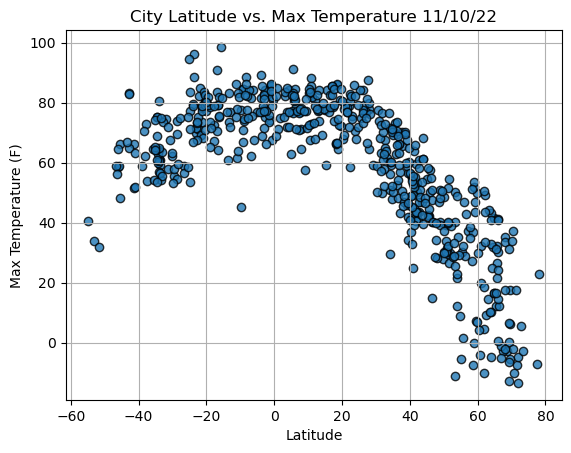

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()